## 1) Loading libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

df = pd.read_csv('./AttendanceMarksSA.csv')
df.head()
df.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


## 2) Co-relation Analysis

In [2]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attendance,MSE,ESE
Attendance,1,-0.0809427,-0.109972
MSE,-0.0809427,1,0.75153
ESE,-0.109972,0.75153,1


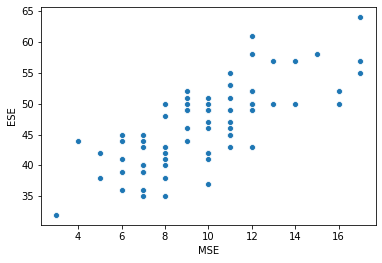

In [3]:
x = df['MSE']
y = df['ESE']

sns.scatterplot(x, y)

## 3) Data Pre-processing


In [5]:
ese = df['ESE']
const_vect = sm.add_constant(df['MSE'])
const_vect

,const,MSE
0,1.0,10
1,1.0,7
2,1.0,3
3,1.0,16
4,1.0,9
...,...,...
68,1.0,10
69,1.0,8
70,1.0,9
71,1.0,11


## 4) Model Building

In [8]:
#Fit and summerize OLS model
# sm.OLS(output vector, input vector)
model = sm.OLS(ese, const_vect)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.85e-14
Time:                        00:50:47   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.000      27.195      34.137
MSE            1.6322      0.170      9.599      0.000       1.293       1.971
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.119
Skew:                          -0.029   Prob(JB):                        0.572
Kurtosis:                       2.396   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual sum error

In [9]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))
    
    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [11]:
rse = RSE(df['ESE'], results.predict())
rse

4.396224549647787

#### Model 2

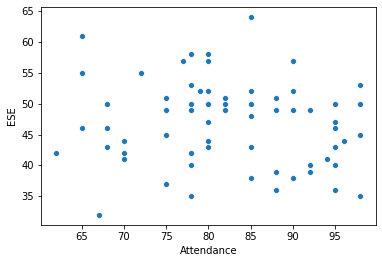

In [13]:
x1 = df['Attendance']
y1 = df['ESE']

sns.scatterplot(x, y)

In [15]:
ese1 = df['ESE']
const_vect1 = sm.add_constant(df['Attendance'])
const_vect1

,const,Attendance
0,1.0,70
1,1.0,92
2,1.0,67
3,1.0,82
4,1.0,80
...,...,...
68,1.0,80
69,1.0,78
70,1.0,92
71,1.0,78


In [16]:
model1 = sm.OLS(ese1, const_vect1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Sat, 17 Oct 2020   Prob (F-statistic):              0.354
Time:                        01:04:21   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.000      39.419      66.349
Attendance    -0.0765      0.082     -0.932      0.354      -0.240       0.087
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.425
Skew:                           0.129   Prob(JB):                        0.808
Kurtosis:                       2.730   Cond. No.                         716.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <strong>From the R-squared, t-statistcs and P values, we can say that 'MSE' is predictor for 'ESE' but the 'Attendance' is not a good predictor for 'ESE'. </strong>